Importing the necessary libraries required. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

Iris dataset is a very common and hence available in the sklearn library. We have imported it in the last line of code 

In [2]:
iris = datasets.load_iris()

The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant. To simplify things, we take just the first two feature columns. Also, the two non-linearly separable classes are labeled with the same category, ending up with a binary classification problem.

Refer the csv file for better understanding.

In [3]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

The following graph plotted shows the points corresponding frrom 2 classes scattered as per different charateristics

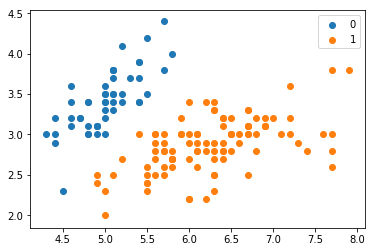

In [4]:
#plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='1')
plt.legend();

Given a set of inputs X, we want to assign them to one of two possible categories (0 or 1). 

To generate probabilities, logistic regression uses a function that gives outputs between 0 and 1 for all values of X. This function is the <b>sigmoid function.</b>

In [5]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False): #lr is the learning rate
                                                                                     #num_iter specifies the no of 
                                                                                     #itierations
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    """Functions have parameters/weights (represented by theta in our notation) and 
    we want to find the best values for them. To start we pick random values and we 
    need a way to measure how well the algorithm performs using those random weights."""
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        #Gradient descent
        """Our goal is to minimize the loss function and the way we have to achive it 
        is by increasing/decreasing the weights, i.e. fitting them."""
        
        """Here we update the weights by substracting to them the derivative times the learning rate.
        We should repeat this steps several times until we reach the optimal solution."""
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient 
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
                
    """Predictions : 
    By calling the sigmoid function we get the probability that some input x belongs to class 1. 
    Let’s take all probabilities ≥ 0.5 = class 1 and all probabilities < 0 = class 0. 
    This threshold should be defined depending on the business problem we were working."""
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [6]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [7]:
model.fit(X, y)

In [8]:
#mean of all the predictions
preds = model.predict(X)
(preds == y).mean()

1.0

In [9]:
model.theta

array([-25.96818124,  12.56179068, -13.44549335])

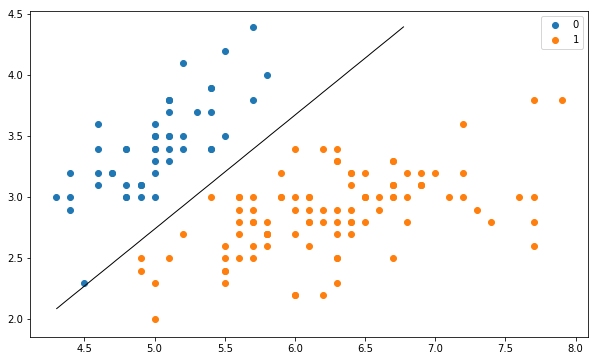

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='1')
plt.legend()

#obtaining the maximum and minimum points for both classes
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),

"""Use of meshgrid :
Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector 
fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn."""
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = model.predict_prob(grid).reshape(xx1.shape)

#contour() draw contour lines. 
#here [0.5] mean array like level which draws contour lines at the specified levels.
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');